In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("Datasets/EV_India.csv")
df.head()

,State Name,Two Wheeler,Three Wheeler,Four Wheeler,Goods Vehicles,Public Service Vehicle,Special Category Vehicles,Ambulance/Hearses,Construction Equipment Vehicle,Other
0,Andaman and Nicobar Island,1,30.0,81,NaN,40.0,NaN,NaN,NaN,7.0
1,Arunachal Pradesh,14,NaN,5,NaN,NaN,NaN,NaN,NaN,1.0
2,Assam,721,47041.0,161,7.0,15.0,NaN,NaN,NaN,2.0
3,Bihar,5003,59079.0,114,11.0,26.0,NaN,NaN,NaN,8.0
4,Chandigarh,298,1410.0,182,NaN,40.0,NaN,NaN,NaN,1.0


In [3]:
df.columns

Index(['State Name', 'Two Wheeler', 'Three Wheeler', 'Four Wheeler',
       'Goods Vehicles', 'Public Service Vehicle', 'Special Category Vehicles',
       'Ambulance/Hearses', 'Construction Equipment Vehicle', 'Other'],
      dtype='object')

#### Descriptive Statistics

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   State Name                      32 non-null     object 
 1   Two Wheeler                     32 non-null     int64  
 2   Three Wheeler                   28 non-null     float64
 3   Four Wheeler                    32 non-null     int64  
 4   Goods Vehicles                  28 non-null     float64
 5   Public Service Vehicle          24 non-null     float64
 6   Special Category Vehicles       9 non-null      float64
 7   Ambulance/Hearses               5 non-null      float64
 8   Construction Equipment Vehicle  5 non-null      float64
 9   Other                           28 non-null     float64
dtypes: float64(7), int64(2), object(1)
memory usage: 2.6+ KB


In [5]:
df.isnull().sum()

State Name                         0
Two Wheeler                        0
Three Wheeler                      4
Four Wheeler                       0
Goods Vehicles                     4
Public Service Vehicle             8
Special Category Vehicles         23
Ambulance/Hearses                 27
Construction Equipment Vehicle    27
Other                              4
dtype: int64

In [6]:
df.replace('NA', np.nan, inplace=True)

In [7]:
df.fillna(df.median(), inplace=True)

# replacing the null values with their median values

In [8]:
df.rename(columns={'Two Wheeler': 'Two-Wheeler', 'Four Wheeler': 'Four-Wheeler', 'Public Service Vehicle': 'PSV'}, inplace=True)

In [9]:
df.head()

,State Name,Two-Wheeler,Three Wheeler,Four-Wheeler,Goods Vehicles,PSV,Special Category Vehicles,Ambulance/Hearses,Construction Equipment Vehicle,Other
0,Andaman and Nicobar Island,1,30.0,81,17.0,40.0,2.0,1.0,1.0,7.0
1,Arunachal Pradesh,14,3674.0,5,17.0,31.0,2.0,1.0,1.0,1.0
2,Assam,721,47041.0,161,7.0,15.0,2.0,1.0,1.0,2.0
3,Bihar,5003,59079.0,114,11.0,26.0,2.0,1.0,1.0,8.0
4,Chandigarh,298,1410.0,182,17.0,40.0,2.0,1.0,1.0,1.0


In [10]:
# Compute descriptive statistics
df.describe()

,Two-Wheeler,Three Wheeler,Four-Wheeler,Goods Vehicles,PSV,Special Category Vehicles,Ambulance/Hearses,Construction Equipment Vehicle,Other
count,32.000000,32.000000,32.00000,32.000000,32.000000,32.000000,32.000000,32.00000,32.000000
mean,8829.437500,20683.812500,822.96875,97.000000,71.468750,14.250000,1.031250,13.25000,140.250000
std,15027.420445,49132.494351,1661.50339,286.929237,158.902077,60.453661,0.176777,64.88501,376.276666
min,1.000000,1.000000,2.00000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000
25%,68.500000,374.000000,13.75000,5.250000,13.750000,2.000000,1.000000,1.00000,6.250000
50%,1984.500000,3674.000000,131.50000,17.000000,31.000000,2.000000,1.000000,1.00000,19.000000
75%,10306.500000,17007.250000,638.50000,31.250000,40.000000,2.000000,1.000000,1.00000,58.000000
max,56737.000000,257159.000000,7212.00000,1281.000000,851.000000,344.000000,2.000000,368.00000,1602.000000


In [11]:
# Compute correlations between variables
df.corr()

,Two-Wheeler,Three Wheeler,Four-Wheeler,Goods Vehicles,PSV,Special Category Vehicles,Ambulance/Hearses,Construction Equipment Vehicle,Other
Two-Wheeler,1.000000,0.150636,0.370150,0.383216,0.528220,0.093031,-0.076373,-0.025209,0.616432
Three Wheeler,0.150636,1.000000,0.045055,-0.057277,0.228812,-0.079276,0.075262,-0.061736,0.220901
Four-Wheeler,0.370150,0.045055,1.000000,-0.054938,-0.066592,0.038628,-0.022841,-0.073890,0.610468
Goods Vehicles,0.383216,-0.057277,-0.054938,1.000000,-0.073532,-0.050939,-0.043882,0.620188,0.075933
PSV,0.528220,0.228812,-0.066592,-0.073532,1.000000,0.296086,0.029319,-0.064760,0.196359
Special Category Vehicles,0.093031,-0.079276,0.038628,-0.050939,0.296086,1.000000,-0.036977,0.030823,-0.021296
Ambulance/Hearses,-0.076373,0.075262,-0.022841,-0.043882,0.029319,-0.036977,1.000000,-0.034451,-0.038433
Construction Equipment Vehicle,-0.025209,-0.061736,-0.073890,0.620188,-0.064760,0.030823,-0.034451,1.000000,-0.021606
Other,0.616432,0.220901,0.610468,0.075933,0.196359,-0.021296,-0.038433,-0.021606,1.000000


Text(0, 0.5, 'CountOfEV')

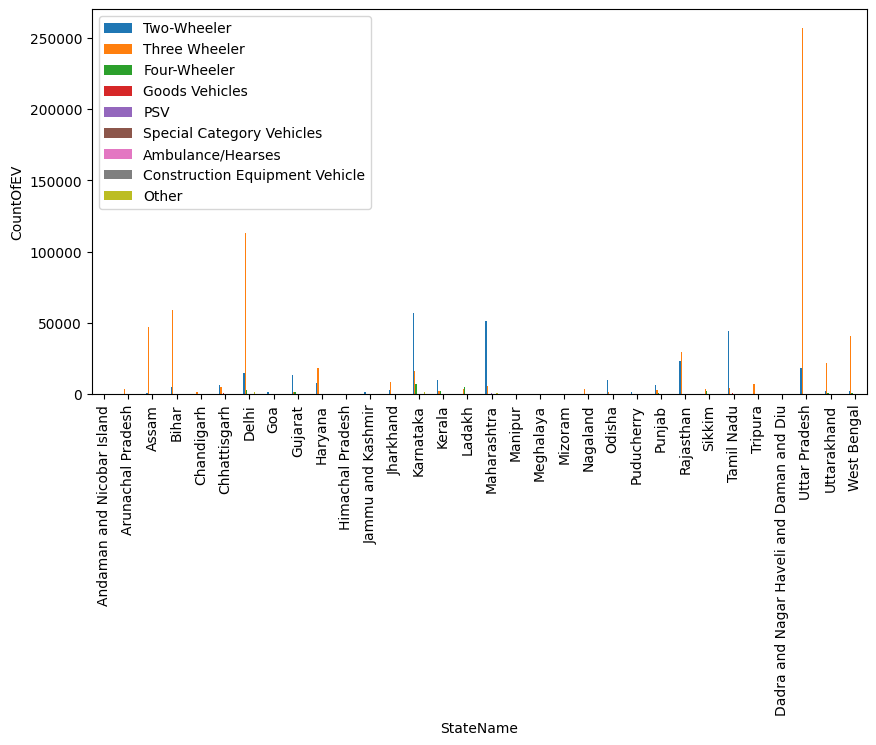

In [12]:
df.plot(kind='bar', x='State Name', y=['Two-Wheeler', 'Three Wheeler', 'Four-Wheeler', 'Goods Vehicles', 'PSV', 'Special Category Vehicles', 'Ambulance/Hearses', 'Construction Equipment Vehicle', 'Other'], figsize=(10,5))
plt.xlabel("StateName")
plt.ylabel("CountOfEV")

<AxesSubplot:xlabel='Two-Wheeler', ylabel='Three Wheeler'>

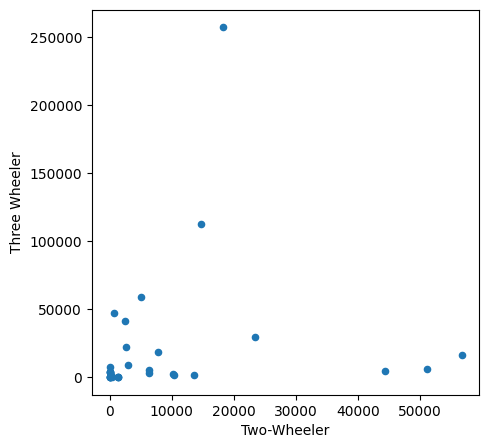

In [13]:
df.plot(kind='scatter', x='Two-Wheeler', y='Three Wheeler', figsize=(5,5))

<AxesSubplot:>

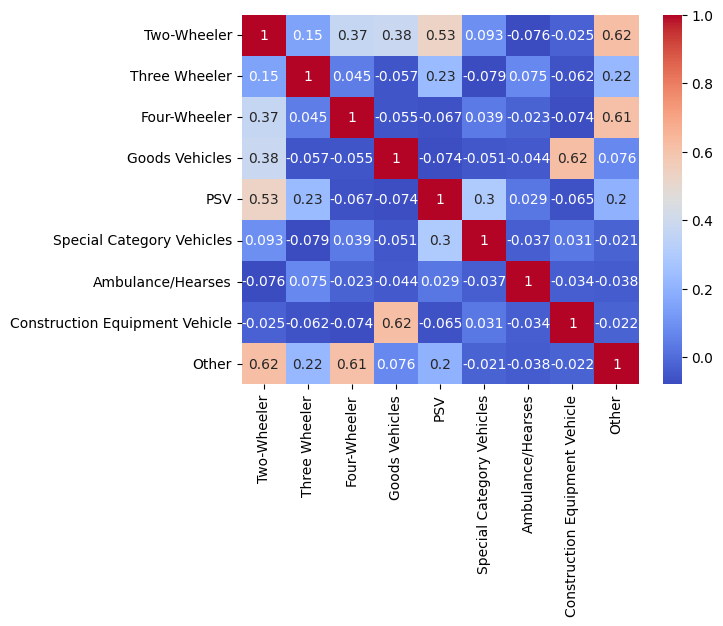

In [14]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

<AxesSubplot:>

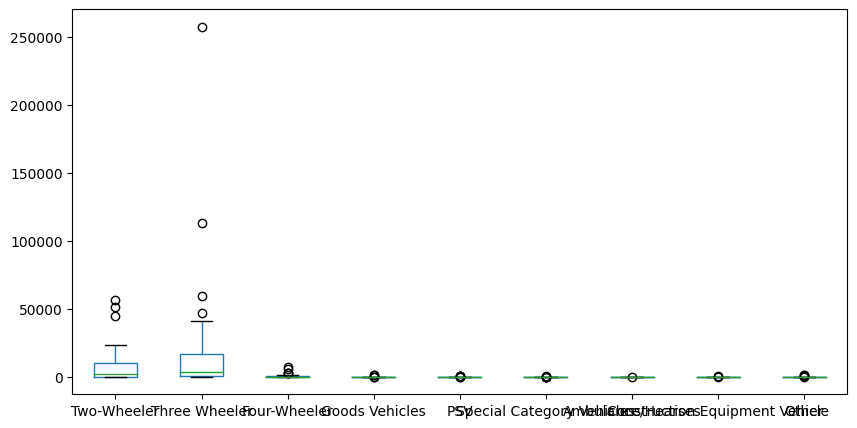

In [15]:
# box plot to identify any outliers or unusual observations in the data
df.plot(kind='box', figsize=(10,5))

## K- Means Custering

C:\Users\tbala\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


2    26
0     4
1     2
Name: Cluster, dtype: int64


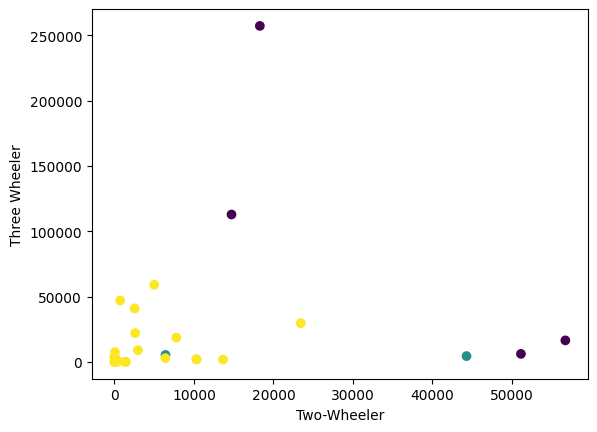

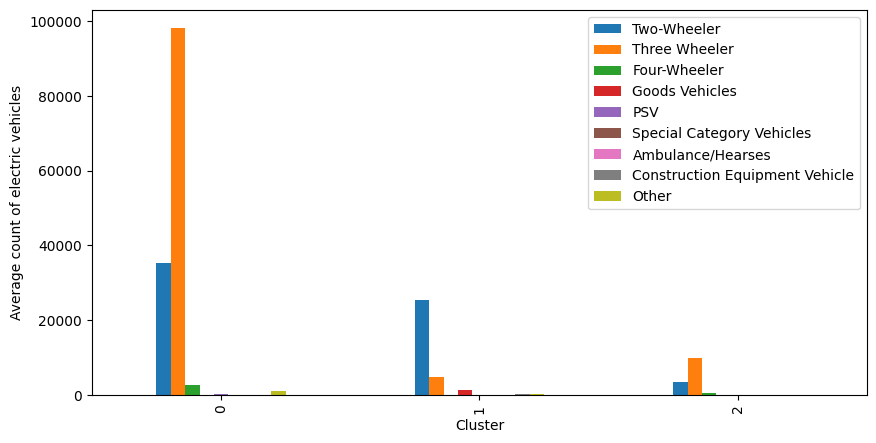

In [20]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


features = ['Two-Wheeler', 'Three Wheeler', 'Four-Wheeler', 'Goods Vehicles', 'PSV', 'Special Category Vehicles', 'Ambulance/Hearses', 'Construction Equipment Vehicle', 'Other']

scaler = StandardScaler()
X = scaler.fit_transform(df[features].values)


kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)


df['Cluster'] = kmeans.labels_


print(df['Cluster'].value_counts())


plt.scatter(df['Two-Wheeler'], df['Three Wheeler'], c=df['Cluster'])
plt.xlabel('Two-Wheeler')
plt.ylabel('Three Wheeler')
plt.show()


df.groupby('Cluster')[features].mean().plot(kind='bar', figsize=(10,5))
plt.xlabel('Cluster')
plt.ylabel('Average count of electric vehicles')
plt.show()


In [16]:
for col in df.columns[1:]:
    if col != 'Grand Total':
        print(f"State with highest {col}: {df.loc[df[col].idxmax(), 'State Name']}")


State with highest Two-Wheeler: Karnataka
State with highest Three Wheeler: Uttar Pradesh
State with highest Four-Wheeler: Karnataka
State with highest Goods Vehicles: Tamil Nadu
State with highest PSV: Maharashtra
State with highest Special Category Vehicles: Gujarat
State with highest Ambulance/Hearses: West Bengal
State with highest Construction Equipment Vehicle: Chhattisgarh
State with highest Other: Delhi


In [17]:
# Identify the category of vehicles that is the most popular in each state
for state in df['State Name']:
    state_data = df.loc[df['State Name']==state].iloc[:,1:]
    if 'Grand Total' in state_data.columns:
        state_data = state_data.drop('Grand Total', axis=1)
    max_value = state_data.max().max()
    for col in state_data.columns:
        if state_data.loc[state_data[col]==max_value, col].any():
            print(f"Most popular category of vehicle in {state}: {col}")


Most popular category of vehicle in Andaman and Nicobar Island: Four-Wheeler
Most popular category of vehicle in Arunachal Pradesh: Three Wheeler
Most popular category of vehicle in Assam: Three Wheeler
Most popular category of vehicle in Bihar: Three Wheeler
Most popular category of vehicle in Chandigarh: Three Wheeler
Most popular category of vehicle in Chhattisgarh: Two-Wheeler
Most popular category of vehicle in Delhi: Three Wheeler
Most popular category of vehicle in Goa: Two-Wheeler
Most popular category of vehicle in Gujarat: Two-Wheeler
Most popular category of vehicle in Haryana: Three Wheeler
Most popular category of vehicle in Himachal Pradesh: Two-Wheeler
Most popular category of vehicle in Jammu and Kashmir: Two-Wheeler
Most popular category of vehicle in Jharkhand: Three Wheeler
Most popular category of vehicle in Karnataka: Two-Wheeler
Most popular category of vehicle in Kerala: Two-Wheeler
Most popular category of vehicle in Ladakh: Four-Wheeler
Most popular category of

Inference:


- The highest number of vehicles in each category and the most popular category of vehicles in each state can still be identified and analyzed using the available data.
- The bar chart and box plot can still be used to compare the number of vehicles in each category across different states and identify any anomalies or unusual observations.